In [30]:
pwd

'/home/adish'

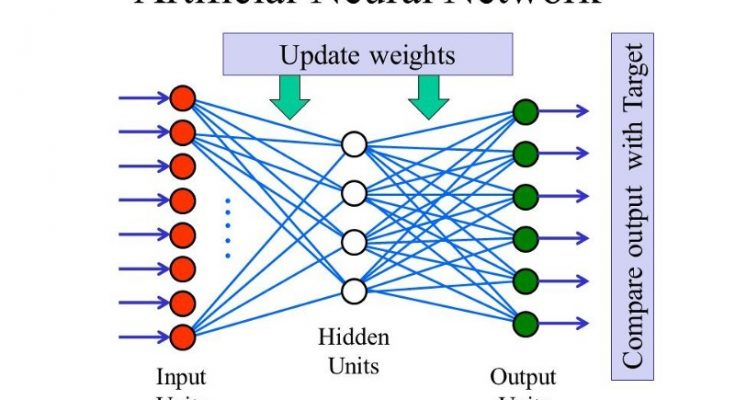

In [31]:
from IPython.display import Image
Image('/home/adish/Downloads/ann_reg.jpeg')

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [10]:
df = pd.read_csv('/home/adish/Desktop/combined_cycle_ powerplant.csv')
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


### The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [11]:
x

array([[   8.34,   40.77, 1010.84,   90.01],
       [  23.64,   58.49, 1011.4 ,   74.2 ],
       [  29.74,   56.9 , 1007.15,   41.91],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [12]:
y

array([480.48, 445.75, 438.76, ..., 465.96, 450.93, 451.67])

In [13]:
 from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Building ann

In [14]:
ann = tf.keras.models.Sequential()

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units=1))

### Training ann

In [22]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
ann.fit(xtrain, ytrain, batch_size = 32, epochs = 100)

Train on 7654 samples
Epoch 1/100
7654/7654 [==============================] - 0s 61us/sample - loss: 26.7166
Epoch 2/100
7654/7654 [==============================] - 0s 44us/sample - loss: 26.9691
Epoch 3/100
7654/7654 [==============================] - 0s 45us/sample - loss: 26.7433
Epoch 4/100
7654/7654 [==============================] - 1s 90us/sample - loss: 26.3417
Epoch 5/100
7654/7654 [==============================] - 0s 63us/sample - loss: 26.6138
Epoch 6/100
7654/7654 [==============================] - 0s 62us/sample - loss: 26.6089
Epoch 7/100
7654/7654 [==============================] - 0s 65us/sample - loss: 26.4362
Epoch 8/100
7654/7654 [==============================] - 0s 44us/sample - loss: 26.7349
Epoch 9/100
7654/7654 [==============================] - 0s 46us/sample - loss: 26.9541
Epoch 10/100
7654/7654 [==============================] - 0s 37us/sample - loss: 27.0090
Epoch 11/100
7654/7654 [==============================] - 0s 36us/sample - loss: 26.4584
Epoch 12

7654/7654 [==============================] - 1s 75us/sample - loss: 24.5762
Epoch 93/100
7654/7654 [==============================] - 1s 72us/sample - loss: 25.1638
Epoch 94/100
7654/7654 [==============================] - 1s 75us/sample - loss: 24.5524
Epoch 95/100
7654/7654 [==============================] - 1s 73us/sample - loss: 25.1211
Epoch 96/100
7654/7654 [==============================] - 1s 75us/sample - loss: 24.7681
Epoch 97/100
7654/7654 [==============================] - 1s 79us/sample - loss: 24.4899
Epoch 98/100
7654/7654 [==============================] - 1s 72us/sample - loss: 24.4515
Epoch 99/100
7654/7654 [==============================] - 1s 73us/sample - loss: 23.9954
Epoch 100/100
7654/7654 [==============================] - 1s 73us/sample - loss: 24.7993


# PREDICTION 

In [29]:
y_pred = ann.predict(xtest)
#np.set_printoptions(precision=2)#to get only 2 values after the decimal
print(np.concatenate((y_pred.reshape(len(y_pred),1), ytest.reshape(len(ytest),1)),1))

[[431.26 426.18]
 [447.46 451.1 ]
 [442.72 442.87]
 ...
 [454.72 454.2 ]
 [446.73 444.13]
 [432.24 436.58]]
